In [1]:
### Section 1: Importing Libraries and Loading Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
# Load dataset
dp = pd.read_csv('Churn_Modelling.csv')

# Display first few rows
dp.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dp = dp.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

### Section 2: Exploratory Data Analysis (EDA)
print("Shape of the dataset:", dp.shape)
print("Summary statistics:\n", dp.describe())

Shape of the dataset: (10000, 11)
Summary statistics:
         CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        

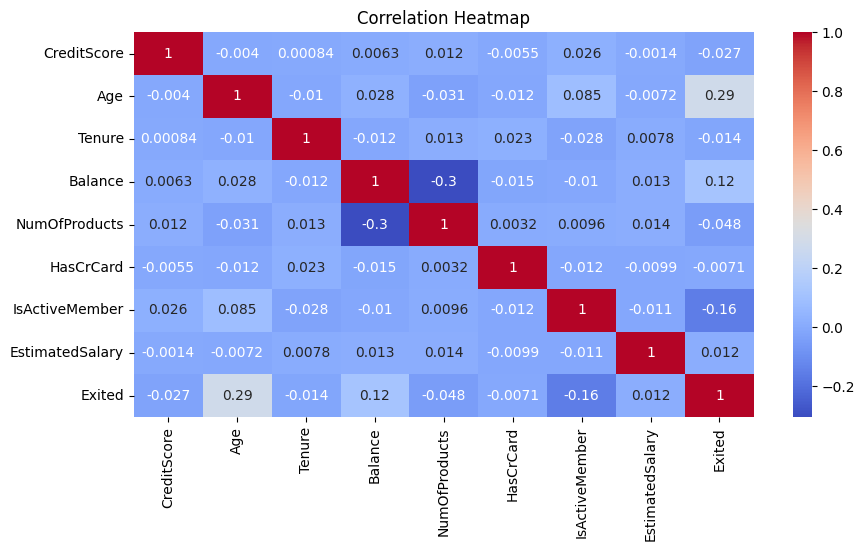

In [4]:
# Heatmap for correlations
plt.figure(figsize=(10, 5))
sns.heatmap(dp.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [5]:
# Value counts for Geography
print("Geography Value Counts:\n", dp['Geography'].value_counts())

Geography Value Counts:
 Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


In [6]:
# Unique values for Geography
print("Unique Geography values:", dp["Geography"].unique())

Unique Geography values: ['France' 'Spain' 'Germany']


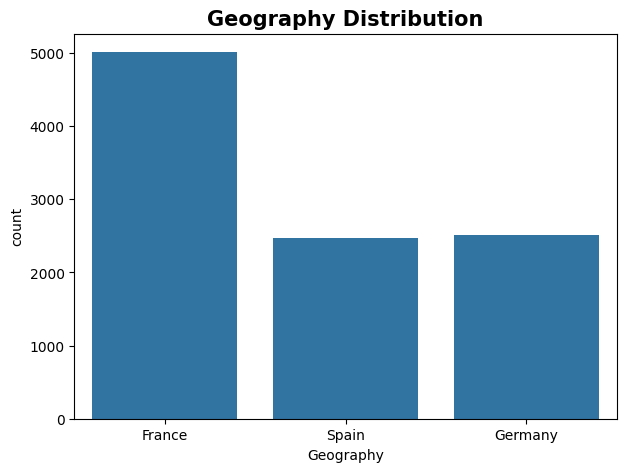

In [7]:
# Count plot for Geography
plt.figure(figsize=(7, 5))
sns.countplot(x='Geography', data=dp).set_title("Geography Distribution", fontsize=15, fontdict={"weight": "bold"})
plt.show()


In [8]:
# Grouped data by Geography and Exited
print("Group by Geography and Exited:\n", dp.groupby(["Geography", "Exited"]).size())

Group by Geography and Exited:
 Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
dtype: int64


In [9]:
# Value counts for Gender
print("Gender Value Counts:\n", dp['Gender'].value_counts())

Gender Value Counts:
 Gender
Male      5457
Female    4543
Name: count, dtype: int64


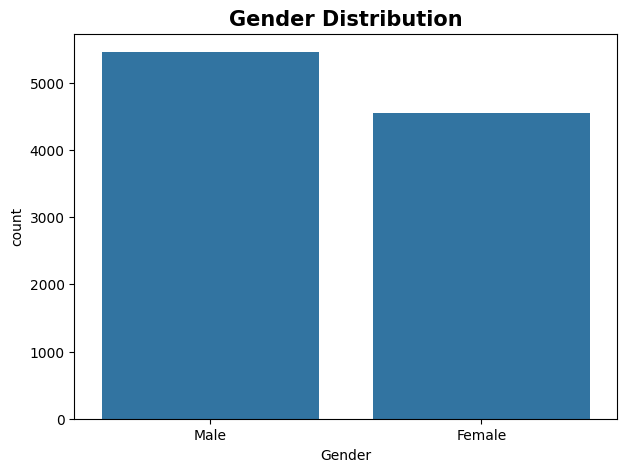

In [10]:
# Count plot for Gender
plt.figure(figsize=(7, 5))
sns.countplot(x='Gender', order=["Male", "Female"], data=dp).set_title("Gender Distribution", fontsize=15, fontdict={"weight": "bold"})
plt.show()


In [11]:
# Grouped data by Gender and Exited
print("Group by Gender and Exited:\n", dp.groupby(["Gender", "Exited"]).size())

Group by Gender and Exited:
 Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
dtype: int64


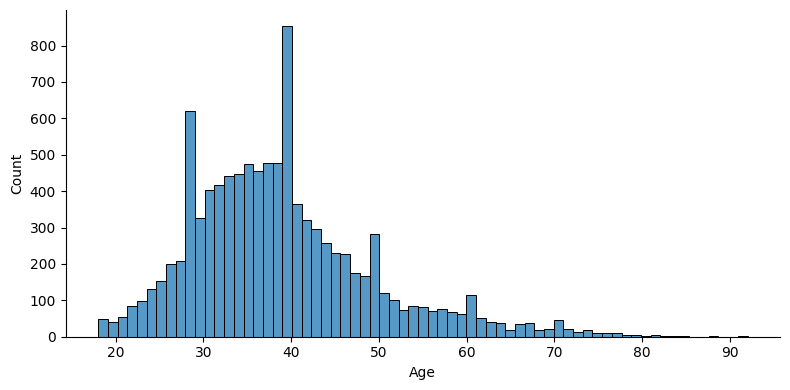

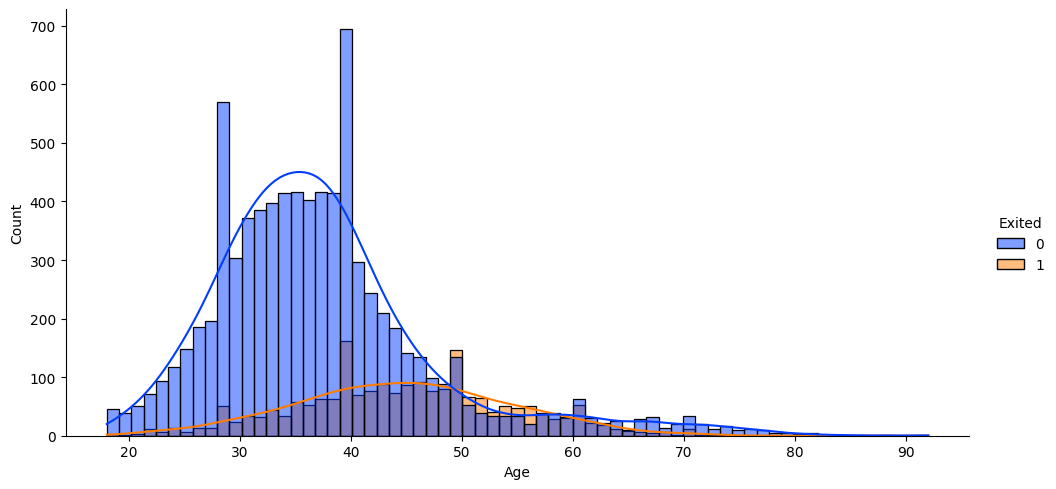

In [12]:
# Age distribution
sns.displot(data=dp, x="Age", height=4, aspect=2)
sns.displot(data=dp, x="Age", hue="Exited", kind="hist", kde=True, palette="bright", height=5, aspect=2)
plt.show()

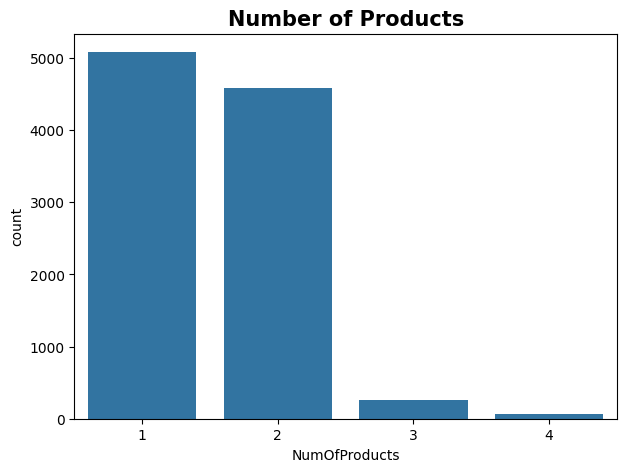

In [13]:
# Count plot for NumOfProducts
plt.figure(figsize=(7, 5))
sns.countplot(x='NumOfProducts', data=dp).set_title("Number of Products", fontsize=15, fontdict={"weight": "bold"})
plt.show()

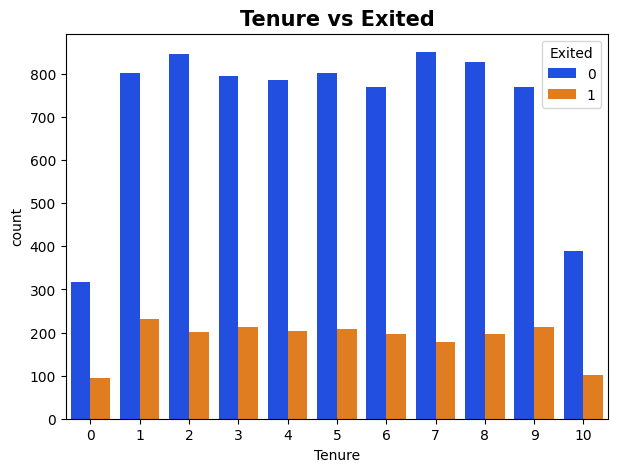

In [14]:
# Count plot for Tenure
plt.figure(figsize=(7, 5))
sns.countplot(x='Tenure', hue="Exited", data=dp, palette='bright').set_title("Tenure vs Exited", fontsize=15, fontdict={"weight": "bold"})
plt.show()

C:\Users\tanvi\AppData\Local\Temp\ipykernel_800\1246486156.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="HasCrCard", data=dp, palette='bright').set_title("Credit Card Holders", fontsize=15, fontdict={"weight": "bold"})


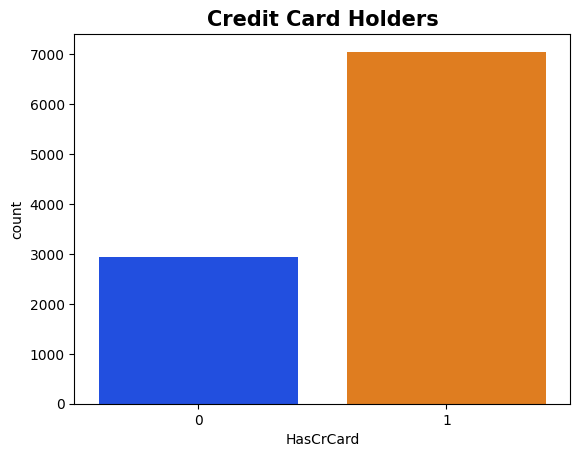

In [15]:
# Count plot for Credit Card Holders
sns.countplot(x="HasCrCard", data=dp, palette='bright').set_title("Credit Card Holders", fontsize=15, fontdict={"weight": "bold"})
plt.show()

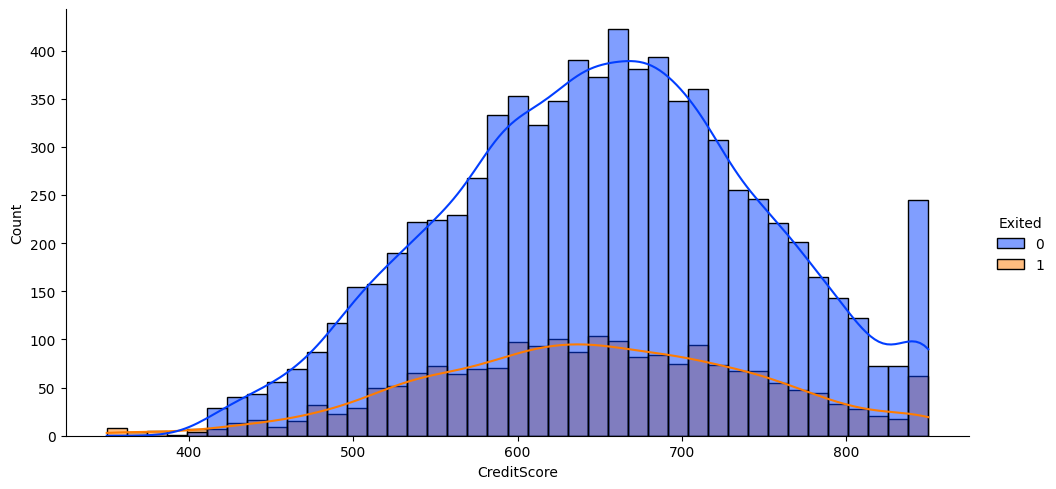

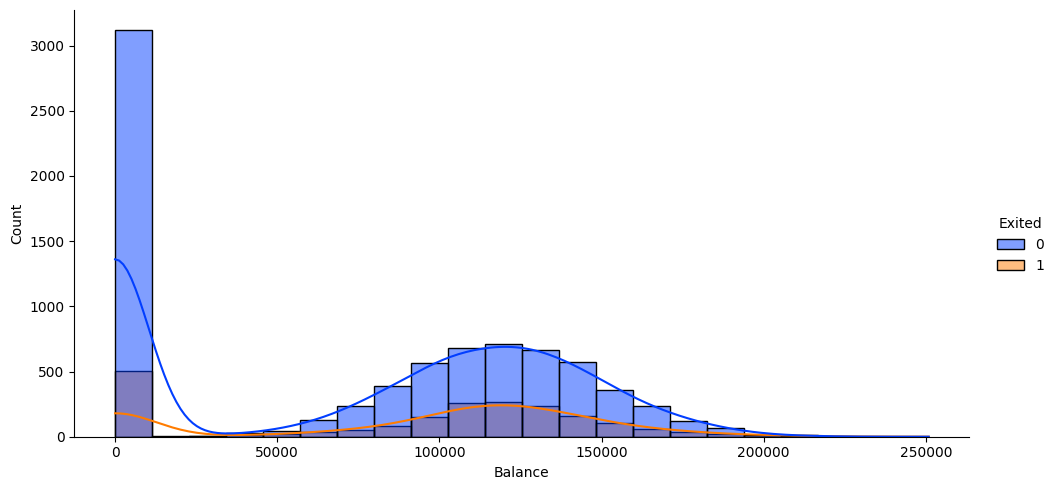

In [16]:
# Distribution plots for Credit Score and Balance
sns.displot(data=dp, x="CreditScore", hue="Exited", palette="bright", kind="hist", kde=True, height=5, aspect=2)
sns.displot(data=dp, x="Balance", hue="Exited", palette="bright", kind="hist", kde=True, height=5, aspect=2)
plt.show()

In [17]:
# Dividing dependent and independent variables
X = dp.drop("Exited", axis=1)  # Features
y = dp["Exited"]  # Target variable

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Handling class imbalance using SMOTE
sampler = SMOTE(random_state=42)
X, y = sampler.fit_resample(X, y)
print("Class distribution after SMOTE:", Counter(y))

Class distribution after SMOTE: Counter({1: 7963, 0: 7963})


In [18]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:

# Logistic Regression
classifier = LogisticRegression(random_state=0)
lr_model = classifier.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("\nClassification Report for Logistic Regression:\n")
print(classification_report(y_test, y_pred_lr))


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      2036
           1       0.77      0.77      0.77      1946

    accuracy                           0.77      3982
   macro avg       0.77      0.77      0.77      3982
weighted avg       0.77      0.77      0.77      3982



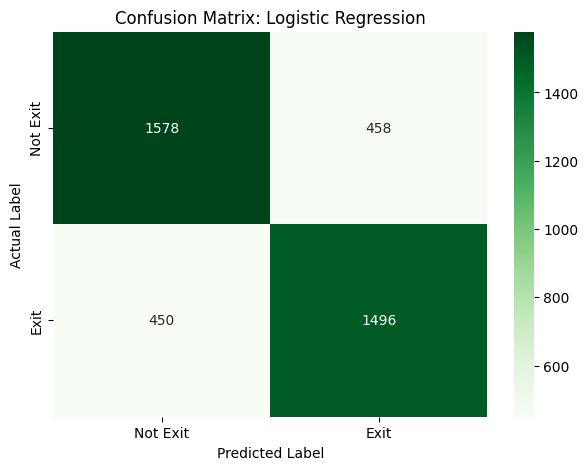

In [20]:
confusion_m_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_m_lr, annot=True, cmap='Greens', fmt='d', xticklabels=['Not Exit', 'Exit'], yticklabels=['Not Exit', 'Exit'])
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [21]:
# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_model = dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\nClassification Report for Decision Tree:\n")
print(classification_report(y_test, y_pred_dt))


Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      2036
           1       0.78      0.81      0.80      1946

    accuracy                           0.80      3982
   macro avg       0.80      0.80      0.80      3982
weighted avg       0.80      0.80      0.80      3982



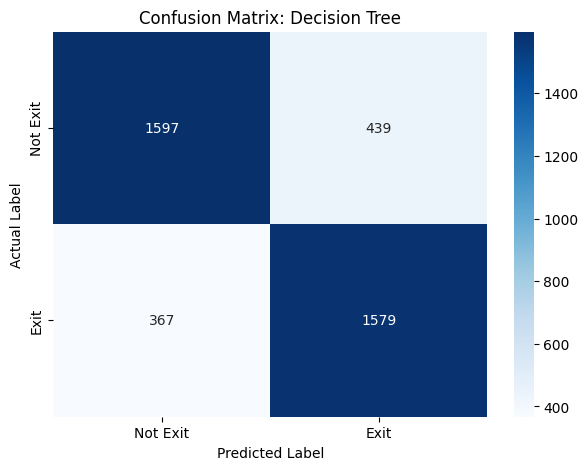

In [22]:
confusion_m_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_m_dt, annot=True, cmap='Blues', fmt='d', xticklabels=['Not Exit', 'Exit'], yticklabels=['Not Exit', 'Exit'])
plt.title("Confusion Matrix: Decision Tree")
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [23]:
# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model = rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nClassification Report for Random Forest:\n")
print(classification_report(y_test, y_pred_rf))


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2036
           1       0.86      0.85      0.86      1946

    accuracy                           0.86      3982
   macro avg       0.86      0.86      0.86      3982
weighted avg       0.86      0.86      0.86      3982



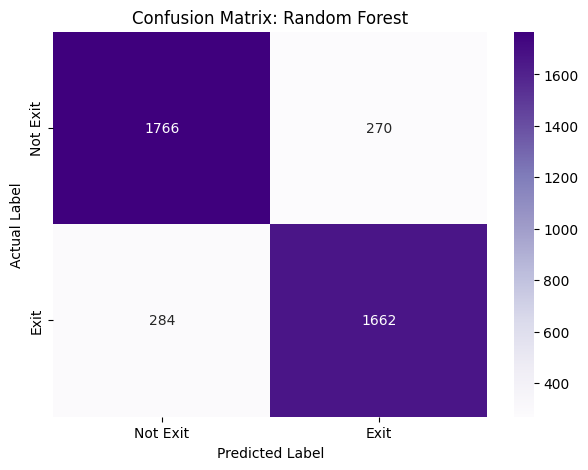

In [24]:
confusion_m_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_m_rf, annot=True, cmap='Purples', fmt='d', xticklabels=['Not Exit', 'Exit'], yticklabels=['Not Exit', 'Exit'])
plt.title("Confusion Matrix: Random Forest")
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [25]:
import pickle

# Save the Random Forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# Save the StandardScaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(sc, file)

print("Model and Scaler saved as pickle files.")

Model and Scaler saved as pickle files.
